In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

分词

In [3]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [4]:
input_str = "Today's weather is good,very windy and sunny, we have no classes in the afternoon. We have to play basketball tomorrow"

In [5]:
tokens = word_tokenize(input_str)
tokens = [word.lower() for word in tokens]#大写转化为小写

In [6]:
tokens[:5]

['today', "'s", 'weather', 'is', 'good']

创建一个Text对象

In [7]:
t = Text(tokens)

In [8]:
t.count('good')

1

In [9]:
t.index('good')

4

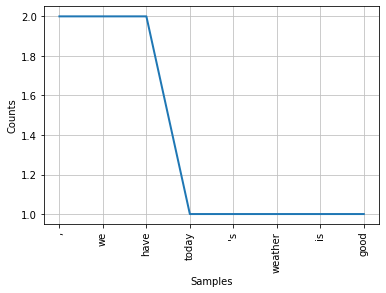

In [27]:
t.plot(8)#选前八个的词的频率

停用词

In [30]:
from nltk.corpus import stopwords
stopwords.readme().replace('\n',' ')

'Stopwords Corpus  This corpus contains lists of stop words for several languages.  These are high-frequency grammatical words which are usually ignored in text retrieval applications.  They were obtained from: http://anoncvs.postgresql.org/cvsweb.cgi/pgsql/src/backend/snowball/stopwords/  The stop words for the Romanian language were obtained from: http://arlc.ro/resources/  The English list has been augmented https://github.com/nltk/nltk_data/issues/22  The German list has been corrected https://github.com/nltk/nltk_data/pull/49  A Kazakh list has been added https://github.com/nltk/nltk_data/pull/52  A Nepali list has been added https://github.com/nltk/nltk_data/pull/83  An Azerbaijani list has been added https://github.com/nltk/nltk_data/pull/100  A Greek list has been added https://github.com/nltk/nltk_data/pull/103  An Indonesian list has been added https://github.com/nltk/nltk_data/pull/112 '

In [31]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [33]:
stopwords.raw('english').replace('\n',' ')

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't "

In [34]:
test_words = "Today's weather is good,very windy and sunny, we have no classes in the afternoon. We have to play basketball tomorrow"
test_words = [word.lower() for word in tokens]
test_words_set = set(test_words)

In [35]:
test_words_set.intersection(set(stopwords.words('english')))

{'and', 'have', 'in', 'is', 'no', 'the', 'to', 'very', 'we'}

#### 过滤掉停用词

In [37]:
filtered = [w for w in test_words_set if(w not in stopwords.words('english'))]
filtered

['afternoon',
 ',',
 'today',
 'weather',
 'basketball',
 'good',
 'windy',
 "'s",
 'play',
 'sunny',
 'tomorrow',
 '.',
 'classes']

词性的标注

In [2]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [11]:
from nltk import pos_tag
tags = pos_tag(tokens)
tags#对句子进行此行分析

[('today', 'NN'),
 ("'s", 'POS'),
 ('weather', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 (',', ','),
 ('very', 'RB'),
 ('windy', 'JJ'),
 ('and', 'CC'),
 ('sunny', 'JJ'),
 (',', ','),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('no', 'DT'),
 ('classes', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('afternoon', 'NN'),
 ('.', '.'),
 ('we', 'PRP'),
 ('have', 'VBP'),
 ('to', 'TO'),
 ('play', 'VB'),
 ('basketball', 'NN'),
 ('tomorrow', 'NN')]

分块

In [12]:
from nltk.chunk import RegexpParser

In [13]:
sentence = [('the','DT'),('little','JJ'),('yellow','JJ'),('dog','NN'),('died','VBD')]
grammer = "MY_NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammer)
result = cp.parse(sentence)
print(result)

result.draw()

(S (MY_NP the/DT little/JJ yellow/JJ dog/NN) died/VBD)


命名实体

In [14]:
from nltk import ne_chunk
sentence = "Edison went to Tsinghua University today"
print(ne_chunk(pos_tag(word_tokenize(sentence))))

(S
  (PERSON Edison/NNP)
  went/VBD
  to/TO
  (ORGANIZATION Tsinghua/NNP University/NNP)
  today/NN)
